In [1]:
#import urllib2
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [2]:
#specify the url
url = "http://www.sejm.gov.pl/sejm8.nsf/posel.xsp?id=001&type=A"
#Query the website and return the html to the variable 'page'
page = requests.get(url)
c = page.content
#soup = BeautifulSoup(page)
soup = BeautifulSoup(c, "lxml")


In [45]:
soup
key = soup.find_all("p", "left", text= True)
value = soup.find_all("p", "right")
#s.find(text= True)
key_sl = []
value_sl = []
for i in range(len(key)):
    key_sl.append(key[i].find(text = True))
    value_sl.append(value[i].find(text = True))
print(key_sl)
print(value_sl)
soup.find("h1", text= True).find(text= True)

['Wybrany dnia:', 'Lista:', 'Okręg wyborczy:', 'Liczba głosów:', 'Staż parlamentarny:', 'Klub/koło:', 'Data i miejsce urodzenia:', 'Wykształcenie:', 'Ukończona szkoła:', 'Zawód:', 'Email:']
['25-10-2015', 'Prawo i Sprawiedliwość', '7\xa0\xa0Chełm', '10500', 'poseł VI kadencji, poseł VII kadencji', 'Klub Parlamentarny Prawo i Sprawiedliwość', '10-03-1961', 'wyższe', 'Politechnika Lubelska, Wydział Mechaniczny i Organizacji Górnictwa i Geologii - magister inżynier (1985)', 'poseł na Sejm', 'pokaż adres email']


In [51]:
 soup.find("h1", text= True).find(text= True)

'Adam Abramowicz'

In [3]:
all_dicts = []
for i in range(1,459):#specify the url
    url = "http://www.sejm.gov.pl/sejm8.nsf/posel.xsp?id="+str(i).zfill(3)+"&type=A"
    #Query the website and return the html to the variable 'page'
    page = requests.get(url)
    c = page.content
    soup = BeautifulSoup(c, "lxml")
    key = soup.find_all("p", "left")
    value = soup.find_all("p", "right")
#s.find(text= True)
    value_sl = []
    key_sl = []
    all_sl = {}
    for j in range(len(key)):
        #value_sl.append(value[j].find(text = True))
        #key_sl.append(key[j].find(text=True))
        all_sl[key[j].find(text = True)] = value[j].find(text=True)
    
    #if all_sl["Funkcja w klubie/kole:"]:
    all_sl.pop("Funkcja w klubie/kole:", None)
    #if all_sl["Email:"]:
    all_sl.pop("Email:", None)
    if "Wybrana dnia:" in all_sl:
        all_sl["Wybrany dnia:"]= all_sl.pop("Wybrana dnia:")
        
    all_sl["imie"]= soup.find("h1", text= True).find(text= True)
    all_dicts.append(all_sl)
    print(i)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [8]:

cols= ["data_uro", "funkc", "klub", "glosy_cnt", "lista", "okreg",  "staz", "strona", "tytul", "szkola", "wybrany", "wygas", "wyksztalcenie", "zawod",  "nazwisko"]

In [14]:
df = pd.DataFrame(data=all_dicts)#, columns = cols)
df.columns = cols

In [15]:
df.head()

,data_uro,funkc,klub,glosy_cnt,lista,okreg,staz,strona,tytul,szkola,wybrany,wygas,wyksztalcenie,zawod,nazwisko
0,10-03-1961,NaN,Klub Parlamentarny Prawo i Sprawiedliwość,10500,Prawo i Sprawiedliwość,7 Chełm,"poseł VI kadencji, poseł VII kadencji",NaN,NaN,"Politechnika Lubelska, Wydział Mechaniczny i O...",25-10-2015,NaN,wyższe,poseł na Sejm,Adam Abramowicz
1,04-01-1959,NaN,Klub Parlamentarny Prawo i Sprawiedliwość,18514,Prawo i Sprawiedliwość,13 Kraków,"poseł V kadencji, poseł VI kadencji, poseł VII...",NaN,NaN,"Społeczna Akademia Nauk w Łodzi, Wydział Zarzą...",25-10-2015,NaN,wyższe,parlamentarzysta,Andrzej Adamczyk
2,21-11-1955,NaN,Klub Parlamentarny Platforma Obywatelska,7275,Platforma Obywatelska,38 Piła,brak,NaN,NaN,"Akademia Rolnicza w Poznaniu, Wydział Rolniczy...",25-10-2015,NaN,wyższe,agroprzedsiębiorca,Zbigniew Ajchler
3,30-06-1990,NaN,Koło Poselskie Wolni i Solidarni,15668,Kukiz'15,24 Białystok,brak,NaN,NaN,"Uniwersytet w Białymstoku, Wydział Historyczno...",25-10-2015,NaN,wyższe,specjalista ds. medialnych,Adam Andruszkiewicz
4,17-09-1971,NaN,Klub Parlamentarny Prawo i Sprawiedliwość,12021,Prawo i Sprawiedliwość,32 Sosnowiec,"poseł V kadencji, poseł VI kadencji, poseł VII...",NaN,NaN,"Uniwersytet Śląski w Katowicach, Wydział Nauk ...",25-10-2015,NaN,wyższe,poseł na Sejm RP,Waldemar Andzel


In [99]:
df.to_csv("osoby.csv", encoding= "utf-8")

In [98]:
pd.read_csv("osoby.csv")

,Unnamed: 0,data_uro,funkc,klub,glosy_cnt,lista,okreg,staz,strona,tytul,szkola,wybrany,wygas,wyksztalcenie,zawod,nazwisko,kadencje_cnt
0,0,10-03-1961,NaN,Klub Parlamentarny Prawo i Sprawiedliwość,10500,Prawo i Sprawiedliwość,7 Chełm,"poseł VI kadencji, poseł VII kadencji",NaN,NaN,"Politechnika Lubelska, Wydział Mechaniczny i O...",25-10-2015,NaN,wyższe,poseł na Sejm,Adam Abramowicz,2
1,1,04-01-1959,NaN,Klub Parlamentarny Prawo i Sprawiedliwość,18514,Prawo i Sprawiedliwość,13 Kraków,"poseł V kadencji, poseł VI kadencji, poseł VII...",NaN,NaN,"Społeczna Akademia Nauk w Łodzi, Wydział Zarzą...",25-10-2015,NaN,wyższe,parlamentarzysta,Andrzej Adamczyk,3
2,2,21-11-1955,NaN,Klub Parlamentarny Platforma Obywatelska,7275,Platforma Obywatelska,38 Piła,brak,NaN,NaN,"Akademia Rolnicza w Poznaniu, Wydział Rolniczy...",25-10-2015,NaN,wyższe,agroprzedsiębiorca,Zbigniew Ajchler,0
3,3,30-06-1990,NaN,Koło Poselskie Wolni i Solidarni,15668,Kukiz'15,24 Białystok,brak,NaN,NaN,"Uniwersytet w Białymstoku, Wydział Historyczno...",25-10-2015,NaN,wyższe,specjalista ds. medialnych,Adam Andruszkiewicz,0
4,4,17-09-1971,NaN,Klub Parlamentarny Prawo i Sprawiedliwość,12021,Prawo i Sprawiedliwość,32 Sosnowiec,"poseł V kadencji, poseł VI kadencji, poseł VII...",NaN,NaN,"Uniwersytet Śląski w Katowicach, Wydział Nauk ...",25-10-2015,NaN,wyższe,poseł na Sejm RP,Waldemar Andzel,3
5,5,08-02-1984,NaN,Klub Poselski Kukiz'15,7935,Kukiz'15,9 Łódź,brak,NaN,NaN,XLI Liceum Ogólnokształcące im. Joachima Lelew...,25-10-2015,NaN,średnie ogólne,dziennikarz,Piotr Apel,0
6,6,16-02-1968,NaN,Klub Parlamentarny Prawo i Sprawiedliwość,25054,Prawo i Sprawiedliwość,26 Gdynia,"poseł III kadencji, poseł IV kadencji, senator...",NaN,NaN,"Uniwersytet Gdański, Wydział Ekonomiki transpo...",25-10-2015,NaN,wyższe,ekonomista,Dorota Arciszewska-Mielewczyk,3
7,7,11-02-1961,NaN,Klub Parlamentarny Prawo i Sprawiedliwość,18366,Prawo i Sprawiedliwość,5 Toruń,poseł VII kadencji,NaN,NaN,"Akademia Techniczno-Rolnicza w Bydgoszczy, Wyd...",25-10-2015,NaN,wyższe,inżynier rolnictwa,Jan Krzysztof Ardanowski,1
8,8,04-06-1968,NaN,Klub Parlamentarny Prawo i Sprawiedliwość,26377,Prawo i Sprawiedliwość,35 Olsztyn,"poseł V kadencji, poseł VI kadencji, poseł VII...",NaN,NaN,"Wyższa Szkoła Pedagogiczna, Wydział Humanistyc...",25-10-2015,NaN,wyższe,politolog,Iwona Arent,3
9,9,30-12-1971,NaN,Klub Parlamentarny Platforma Obywatelska,20678,Platforma Obywatelska,41 Szczecin,"poseł VI kadencji, poseł VII kadencji",NaN,NaN,"Pomorska Akademia Medyczna, Wydział Lekarski -...",25-10-2015,NaN,wyższe,lekarz,Bartosz Arłukowicz,2


 # Ilość głosów

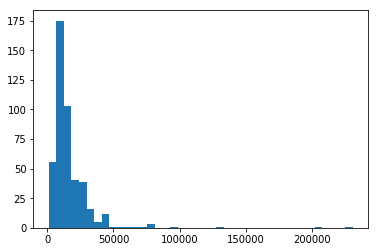

In [49]:
len(df)
df.glosy_cnt = pd.to_numeric(df.glosy_cnt)
df.glosy_cnt.sum()
import matplotlib.pyplot as plt
#from numpy.random import normal
#gaussian_numbers = normal(size=1000)
plt.hist(df.glosy_cnt, bins=40)#, density= True)
plt.show()



# Posłowie z największą ilością kadencji

In [95]:
licznosc = df.groupby("kadencje_cnt").size().as_matrix()
a= list(range(0,8))
a
licznosc


array([207,  58,  66,  85,  28,  11,   2,   1], dtype=int64)

In [79]:
import re
df['kadencje_cnt'] = df.staz.apply(lambda x: len(re.findall("poseł", x)))
df.query("kadencje_cnt in [6,7]")

,data_uro,funkc,klub,glosy_cnt,lista,okreg,staz,strona,tytul,szkola,wybrany,wygas,wyksztalcenie,zawod,nazwisko,kadencje_cnt
145,18-06-1949,NaN,Klub Parlamentarny Prawo i Sprawiedliwość,202424,Prawo i Sprawiedliwość,19 Warszawa,"senator I kadencji, poseł I kadencji, poseł II...",NaN,doktor,"Uniwersytet Warszawski, Wydział Prawa i Admini...",25-10-2015,NaN,wyższe,prawnik,Jarosław Kaczyński,6
335,08-04-1958,NaN,Klub Poselski Polskiego Stronnictwa Ludowego -...,11892,Polskie Stronnictwo Ludowe,18 Siedlce,"poseł II kadencji, poseł III kadencji, poseł I...",NaN,doktor,"Wyższa Szkoła Rolniczo-Pedagogiczna, Wydział R...",25-10-2015,NaN,wyższe,inżynier rolnictwa,Marek Sawicki,6
391,03-01-1941,NaN,Klub Parlamentarny Platforma Obywatelska,21424,Platforma Obywatelska,9 Łódź,"poseł I kadencji, poseł II kadencji, poseł III...",NaN,NaN,"Uniwersytet Łódzki, Wydział Filologiczny, Filo...",25-10-2015,NaN,wyższe,dziennikarz,Iwona Śledzińska-Katarasińska,7
